Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils 

import cv2
import os
import scipy.io as sio

%matplotlib inline

Using TensorFlow backend.


Loading train and test data from drive via scipy module

In [0]:
train = sio.loadmat('/content/drive/My Drive/Data Science/SVHN/train_32x32.mat')
test = sio.loadmat('/content/drive/My Drive/Data Science/SVHN/test_32x32.mat')

Splitting of train and test data into feature and label

X - Features

y - Labels

In [0]:
X_train = train['X']
y_train = train['y']
X_test = test['X']
y_test = test['y']

In [4]:
X_train[0]

array([[[ 33,  84,  19, ...,  92, 190, 216],
        [ 30,  76,  54, ...,  78, 188, 217],
        [ 38,  59, 110, ..., 101, 191, 212]],

       [[ 15,  86,  20, ...,  94, 205, 221],
        [ 23,  73,  52, ...,  82, 203, 222],
        [ 19,  66, 111, ..., 105, 206, 217]],

       [[ 15,  77,  25, ..., 114, 220, 226],
        [ 17,  78,  57, ..., 101, 218, 227],
        [ 19,  56, 116, ..., 125, 220, 221]],

       ...,

       [[ 72,  90,  65, ..., 200, 229, 200],
        [ 65,  78, 144, ..., 201, 231, 199],
        [ 56,  69, 223, ..., 203, 224, 191]],

       [[ 82,  88,  78, ..., 192, 229, 193],
        [ 77,  77, 148, ..., 193, 229, 188],
        [ 57,  67, 218, ..., 195, 224, 182]],

       [[ 89,  88,  98, ..., 190, 229, 197],
        [ 79,  78, 158, ..., 191, 228, 189],
        [ 59,  66, 220, ..., 193, 223, 186]]], dtype=uint8)

Unique values in Labels

In [5]:
np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

Assigning Label '10' to '0'

In [0]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Shape of Features and Labels

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32, 32, 3, 73257) (73257, 1)
(32, 32, 3, 26032) (26032, 1)


Transposing shape of Train and Test data (values, height, width, channel)

In [9]:
X_train = np.transpose(X_train, axes=(3,0,1,2))
X_test = np.transpose(X_test, axes=(3,0,1,2))

print(X_train.shape)
print(X_test.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


Transposing shape of labels to 1D array

In [10]:
y_train = y_train[:,0]
y_test = y_test[:,0]

print(y_train.shape)
print(y_test.shape)

(73257,)
(26032,)


Supporting function to plot images of train and test data

In [0]:
def plot_images(img, labels, nrows, ncols):
  fig, axes = plt.subplots(nrows, ncols)
  for i, ax in enumerate(axes.flat):
    if img[i].shape == (32, 32, 3):
      ax.imshow(img[i])
    else:
      ax.imshow(img[i,:,:,0])
    ax.set_xticks([]) 
    ax.set_yticks([])
    ax.set_title(labels[i])

Plotting train dataset images

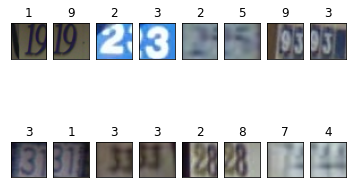

In [12]:
plot_images(X_train, y_train, 2, 8)

Plotting test dataset images

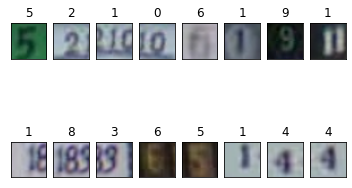

In [13]:
plot_images(X_test, y_test, 2, 8)

Normalization of Features 

In [0]:
X_train = X_train/255
X_test = X_test/255

Conversion of labels into binary categorical data

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
X_train[0]

array([[[0.12941176, 0.11764706, 0.14901961],
        [0.05882353, 0.09019608, 0.0745098 ],
        [0.05882353, 0.06666667, 0.0745098 ],
        ...,
        [0.28235294, 0.25490196, 0.21960784],
        [0.32156863, 0.30196078, 0.22352941],
        [0.34901961, 0.30980392, 0.23137255]],

       [[0.10980392, 0.15294118, 0.1372549 ],
        [0.05490196, 0.09803922, 0.08627451],
        [0.05490196, 0.07843137, 0.06666667],
        ...,
        [0.15686275, 0.15294118, 0.19607843],
        [0.2627451 , 0.22745098, 0.20392157],
        [0.3254902 , 0.30588235, 0.23529412]],

       [[0.15686275, 0.16078431, 0.14901961],
        [0.07058824, 0.08235294, 0.10196078],
        [0.0627451 , 0.06666667, 0.09019608],
        ...,
        [0.09019608, 0.11372549, 0.17647059],
        [0.1372549 , 0.16470588, 0.17254902],
        [0.28235294, 0.27058824, 0.20784314]],

       ...,

       [[0.3372549 , 0.31764706, 0.29411765],
        [0.34117647, 0.32156863, 0.27843137],
        [0.32156863, 0

In [17]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Building a model with Sequential method

In [0]:
model = Sequential()

Adding Convolution layers to model and Maxpooling each layers

In [0]:
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape= (32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

Flattening of input data

In [0]:
model.add(Flatten())

Building Neural Network

In [0]:
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

Compiling of model

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fitting model

In [24]:
model.fit(X_train, y_train, batch_size=200, epochs=10)

Epoch 1/10
367/367 [==============================] - 2s 6ms/step - loss: 1.2650 - accuracy: 0.5648
Epoch 2/10
367/367 [==============================] - 2s 6ms/step - loss: 0.6593 - accuracy: 0.7947
Epoch 3/10
367/367 [==============================] - 2s 6ms/step - loss: 0.5413 - accuracy: 0.8338
Epoch 4/10
367/367 [==============================] - 2s 6ms/step - loss: 0.4796 - accuracy: 0.8557
Epoch 5/10
367/367 [==============================] - 2s 6ms/step - loss: 0.4350 - accuracy: 0.8700
Epoch 6/10
367/367 [==============================] - 2s 6ms/step - loss: 0.4081 - accuracy: 0.8798
Epoch 7/10
367/367 [==============================] - 2s 6ms/step - loss: 0.3868 - accuracy: 0.8839
Epoch 8/10
367/367 [==============================] - 2s 6ms/step - loss: 0.3701 - accuracy: 0.8901
Epoch 9/10
367/367 [==============================] - 2s 6ms/step - loss: 0.3560 - accuracy: 0.8949
Epoch 10/10
367/367 [==============================] - 2s 6ms/step - loss: 0.3405 - accuracy: 0.9000

Evaluating model

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)

print('loss of model :' , loss)
print(" ")
print('accuracy of model :', accuracy)

814/814 [==============================] - 2s 2ms/step - loss: 0.3984 - accuracy: 0.8800
loss of model : 0.3983917534351349
 
accuracy of model : 0.8800322413444519


Predicting Classes of test data

In [55]:
X_test[35].shape

(32, 32, 3)

Visualizing test data to be predicted

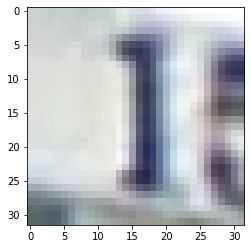

In [52]:
plt.imshow(X_test[35])

Predicting test data is assigned to 'pred' variable and reshaping it

In [56]:
pred = X_test[35]
pred = pred.reshape((1,)+pred.shape)
pred.shape

(1, 32, 32, 3)

Predicting class of test data

In [57]:
model.predict_classes(pred)

array([1])